<a href="https://colab.research.google.com/github/Nikelroid/DeepLearning_Project/blob/main/project_phase0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading data onto the disk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cd drive/My Drive/deep_learning/Project

/content/drive/My Drive/deep_learning/Project


In [ ]:
# !ls drive/My\ Drive/

In [ ]:
# !cp train_ende.zip .
# !cp test.zip .

cp: 'train_ende.zip' and './train_ende.zip' are the same file
cp: 'test.zip' and './test.zip' are the same file


In [ ]:
! git clone https://github.com/XL2248/MSCTD

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 10.13 MiB/s, done.
Resolving deltas: 100% (616/616), done.
Checking out files: 100% (934/934), done.


In [ ]:
!cp MSCTD/MSCTD_data/ende/english_*.txt .
!cp MSCTD/MSCTD_data/ende/image_index_*.txt .
!cp MSCTD/MSCTD_data/ende/sentiment_*.txt .

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1GAZgPpTUBSfhne-Tp0GDkvSHuq6EMMbj
!gdown --id 1B9ZFmSTqfTMaqJ15nQDrRNLqBvo-B39W


In [1]:
%%bash
for x in *.zip
do
  unzip -qq $x
done;

In [ ]:
!mkdir dataset
!cd dataset; mkdir train test dev

mkdir: cannot create directory ‘dataset’: File exists


In [ ]:
#!mv --help

In [ ]:
!mv *train* dataset/train
!mv *test* dataset/test
!mv *dev* dataset/dev

mv: cannot stat '*train*': No such file or directory
mv: cannot stat '*test*': No such file or directory
mv: cannot stat '*dev*': No such file or directory


In [ ]:
!ls dataset/train/train_ende | head

0.jpg
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg


In [ ]:
!head dataset/train/english_train.txt

Okay. I'm confused.
You don't care if I go to Paris with Jane,
I'm sorry. I have to tell you something,
I have to go.
I'm an accessory to murder.
I think you've helped enough.
Gaby, please. I can't stand this anymore.
Can't we talk for a minute?
To be honest,
Wait. What do you mean?


In [ ]:
!head dataset/train/sentiment_train.txt

0
0
1
1
1
2
1
1
0
1


In [ ]:
!head dataset/train/image_index_train.txt

[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]
[10, 11, 12, 13, 14, 15, 16]
[17, 18, 19, 20, 21]
[22, 23, 24, 25, 26]
[27, 28, 29, 30, 31]
[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
[43, 44, 45, 46, 47, 48, 49, 50, 51]
[52, 53, 54, 55, 56, 57]
[58, 59, 60, 61, 62]


#Dataset and Dataloader

In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.3 MB/s eta 0:00:00


In [ ]:
import torch
from torchvision import transforms as T
from torchvision.io import read_image
from torch.utils.data import Dataset
from torch.utils.data import Dataloader

from PIL import Image
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import groupby
import seaborn as sns
import cv2
from mtcnn.mtcnn import MTCNN
# import linecache

In [ ]:
class MSCTD_Dataset (Dataset):
  def __init__(self, dataset_dir, images_dir, conversation_dir, texts, sentiments, transform=None):
    self.dataset_path = Path(dataset_dir)
    self.images_path = self.dataset_path / images_dir
    self.sentiment_path = self.dataset_path / sentiments
    self.text_path = self.dataset_path / texts
    self.conversations_path = self.dataset_path / conversation_dir

    self.transform = transform

    with open(self.sentiment_path, 'r') as f:
      self.length = len(f.readlines())

    with open(self.text_path, 'r') as f:
        self.texts = f.read().splitlines()

    with open(self.sentiment_path, 'r') as f:
        self.sentiments = np.array(f.read().splitlines()).astype("int32")
    
    with open(self.conversations_path, 'r') as f:
        self.conversations = np.array(f.read().splitlines())
    
  def __len__(self):
        return self.length

  def __getitem__(self, idx):
        img_path = self.images_path / f'{idx}.jpg'
        image = Image.open(img_path)
        # image = read_image(str(img_path))
        if self.transform:
            image = self.transform(image)
       
        txt = self.texts[idx].strip()
        
        sentiment = self.sentiments[idx]

        data_dict = {"text":txt,
                     "image":image,
                     "sentiment":sentiment}
        return data_dict

In [ ]:
trainset = MSCTD_Dataset('dataset/train', 'train_ende', 'image_index_train.txt', 'english_train.txt', 'sentiment_train.txt')

In [ ]:
text, image, sentiment = trainset[14787].values()

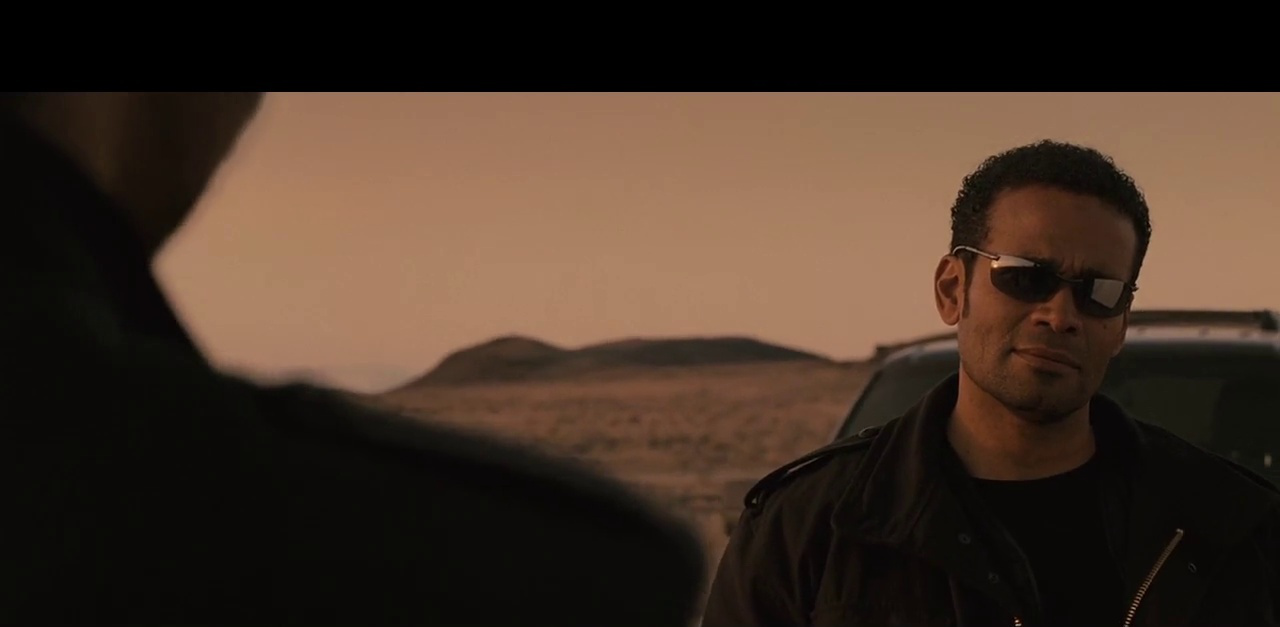

In [ ]:
image

#Graphs and analysis


In [ ]:
texts = trainset.texts
sentiments = trainset.sentiments
conversations = trainset.conversations

##Sentiments histogram







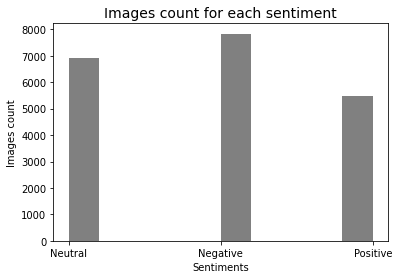

In [ ]:
labels = np.vectorize(lambda t: ['Neutral' , 'Negative' , 'Positive'][t])(sentiments)

plt.hist(labels, color = 'gray')
plt.xlabel("Sentiments")
plt.ylabel("Images count")
plt.title("Images count for each sentiment",{'fontsize' : 14})
plt.show()

## Length of Sentences

In [ ]:
sentence_lengths = np.array(list(map(lambda x: len(x.split()), texts)))

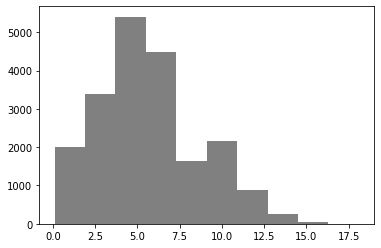

In [ ]:
plt.hist(sentence_lengths, align='left',color = 'gray')
plt.show()

In [ ]:
print(f'mean and variance of number of words in each sentence:\nmean={np.mean(sentence_lengths)}, var={np.var(sentence_lengths)}')

mean and variance of number of words in each sentence:
mean=6.4644268774703555, var=9.247252339514754


## Correlation of sentiments and length of sentences:

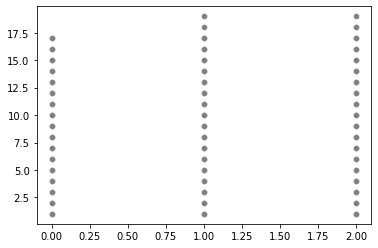

In [ ]:
sns.scatterplot(x=sentiments, y=sentence_lengths,color='gray');

In [ ]:
np.corrcoef(sentiments, sentence_lengths)[0, 1]

0.10847632006719768

##Histogram, variance, and mean number of images within conversations

In [ ]:
def length_find(string):
  string = string.replace('[','')
  string = string.replace(']','')
  return len(string.split(','))

In [ ]:
conversations_lengths = np.zeros(conversations.shape)
for (index,x) in enumerate(conversations) :
  conversations_lengths[index] = length_find(conversations[index])

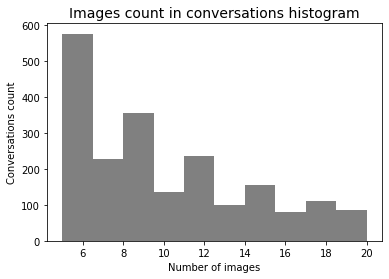

In [ ]:
plt.hist(conversations_lengths,align='mid', color = 'gray')
plt.xlabel("Number of images")
plt.ylabel("Conversations count")
plt.title("Images count in conversations histogram",{'fontsize' : 14})
plt.show()

In [ ]:
print(f'mean and variance of number of images in each conversation:\nmean={np.mean(conversations_lengths):>0.0f}, var={np.var(conversations_lengths):>0.4f}')

mean and variance of number of images in each conversation:
mean=10, var=17.6963


##Histogram of face counts in each image

In [ ]:
!pip install git+https://github.com/elliottzheng/face-detection.git@master
from skimage import io
from face_detection import RetinaFace
detector = RetinaFace(gpu_id=0) 

def counter(image):
    faces = detector(image)
    count = 0
    for i in range(len(faces)):
      _, _, score = faces[i]
      if score>0.95:
        count += 1
    return count

In [ ]:
face_numbers = []
from tqdm import tqdm
for i in tqdm(range(len(trainset))):
  _,img,_ = trainset[i].values()
  #display(img)
  img = img.convert('RGB')
  number = counter(np.array(img))
  #print (number)
  face_numbers.append(number)

faces = np.array(face_numbers)

100%|██████████| 20240/20240 [53:17<00:00,  6.33it/s]


In [ ]:
m = np.argmax(faces)
print(m)
print(faces[m])

6987
48


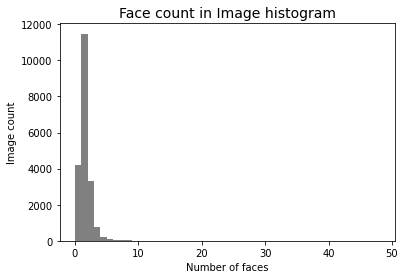

In [ ]:
plt.hist(faces,align='mid', color = 'gray',bins=faces[m],range=[0,faces[m]])
plt.xlabel("Number of faces")
plt.ylabel("Image count")
plt.title("Face count in Image histogram",{'fontsize' : 14})
plt.show()

In [ ]:
mean = np.mean(faces)
var = np.var(faces)

In [ ]:
print(f'mean and variance of number of faces recognized in each image:\nmean={mean:>0.4f}, var={var:>0.4f}')

mean and variance of number of faces recognized in each image:
mean=1.1543, var=1.6695


##Histogram of time patterns

###First we plot using hist function

In [ ]:
def time_pattern(index_list_string):
  index_list_string = index_list_string.replace('[','')
  index_list_string = index_list_string.replace(']','')
  ind_list = np.array(index_list_string.split(',')).astype("int32")
  sents = np.vectorize(lambda t: sentiments[t])(ind_list)
  return ''.join(np.array([sent for sent, _group in groupby(sents)]).astype(str))

In [ ]:
pattern_list = list(map(lambda x: time_pattern(x), conversations))

In [ ]:
pattern_list[:5]

['01', '2101', '12', '120', '10']

In [ ]:
plt.figure(figsize=(120, 15), dpi=256)
plt.hist(pattern_list, color = 'gray',bins =900)
plt.xticks(rotation ='vertical')
plt.xlabel("time pattern" , {'fontsize' : 50})
plt.ylabel("Images count",{'fontsize' : 50})
plt.title("Images count for each time pattern",{'fontsize' : 100})
plt.show()

###It is of no harm, plottig with another method.(bar plot)

In [ ]:
uniques, counts = np.unique(pattern_list,return_counts = True)

In [ ]:
counts[:5]

array([27, 40, 61, 31, 16])

In [ ]:
uniques[:5]

array(['0', '01', '010', '0101', '01010'], dtype='<U16')

In [ ]:
len(uniques)

681

In [ ]:
plt.figure(figsize=(120, 15), dpi=256)
plt.bar(uniques,counts, color = 'gray')
plt.xticks(rotation ='vertical')
plt.xlabel("time pattern" , {'fontsize' : 50})
plt.ylabel("Images count",{'fontsize' : 50})
plt.title("Images count for each time pattern",{'fontsize' : 100})
plt.show()

##Number of patterns on the paper and in the results of histogram

We assume that all of the conversations are of the same length(being equal to mean which is 10). For each conversation of length 10, the number of possible patterns would be as follows : 
$$
patternsNum = 3+3\times2+...+3\times2^9=3\sum_{i=0}^92^i =3\times(2^{10}-1)\\
pattermsNum = 3069
$$

But there are only **681** unique patterns in the dataset. Which makes sense. A couple of reasons come to mind:


1.   First of all, the distribution of patterns lengths is highly variated and our conversations lengths are not closely distributed around the mean. Patterns smaller in length are well supposed to come in less different patterns.
2.   About patterns with lengths bigger than the average, So many outliers are expected i.e. patterns with multiple sequential negative and positive vibes seem to be scarce.




